<a href="https://colab.research.google.com/github/Dhairya2412/EDA_DA_21BDS0321/blob/main/EDA_DA_1_21BDS0321.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing Necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
#Import the Data set.
path = "/content/drive/MyDrive/Dataset_EDA/indo_rct.csv"

In [ ]:
#Read the Data Set
df = pd.read_csv(path)
df.head()

,rownames,id,site,age,risk,gender,outcome,sod,pep,recpanc,...,sodsom,bsphinc,bstent,chole,pbmal,train,status,type,rx,bleed
0,1,1001,1_UM,26,2.0,1_female,1_yes,1_yes,0_no,1_yes,...,0_no,0_no,0_no,0_no,0_no,1_yes,1_outpatient,1_type 1,1_indomethacin,NaN
1,2,1002,1_UM,24,1.0,2_male,0_no,0_no,1_yes,0_no,...,0_no,1_yes,1_yes,1_yes,0_no,0_no,1_outpatient,0_no SOD,0_placebo,NaN
2,3,1003,1_UM,57,1.0,1_female,0_no,1_yes,0_no,0_no,...,0_no,0_no,0_no,0_no,0_no,0_no,1_outpatient,2_type 2,0_placebo,NaN
3,4,1004,1_UM,29,2.0,1_female,1_yes,1_yes,0_no,0_no,...,0_no,1_yes,0_no,1_yes,0_no,1_yes,1_outpatient,1_type 1,0_placebo,NaN
4,5,1005,1_UM,38,3.5,1_female,0_no,1_yes,1_yes,0_no,...,1_yes,1_yes,0_no,0_no,0_no,1_yes,0_inpatient,1_type 1,1_indomethacin,NaN


In [ ]:
#Performing data deduplication

df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
597,False
598,False
599,False
600,False


In [ ]:
# Now, we can drop these duplicates using the drop_duplicates() method:
print(df.shape)
df1 = df.drop_duplicates()
print(df1)
print("Shape Of Data Set After Dropping Duplicates:")
print(df1.shape)

(602, 34)
     rownames    id    site  age  risk    gender outcome    sod    pep  \
0           1  1001    1_UM   26   2.0  1_female   1_yes  1_yes   0_no   
1           2  1002    1_UM   24   1.0    2_male    0_no   0_no  1_yes   
2           3  1003    1_UM   57   1.0  1_female    0_no  1_yes   0_no   
3           4  1004    1_UM   29   2.0  1_female   1_yes  1_yes   0_no   
4           5  1005    1_UM   38   3.5  1_female    0_no  1_yes  1_yes   
..        ...   ...     ...  ...   ...       ...     ...    ...    ...   
597       598  3021    3_UK   39   2.0  1_female    0_no   0_no   0_no   
598       599  3022    3_UK   50   2.5  1_female    0_no  1_yes   0_no   
599       600  4001  4_Case   29   1.5  1_female    0_no   0_no   0_no   
600       601  4002  4_Case   40   1.5  1_female    0_no  1_yes   0_no   
601       602  4003  4_Case   73   2.0  1_female    0_no   0_no   0_no   

    recpanc  ... sodsom bsphinc bstent  chole pbmal  train        status  \
0     1_yes  ...   0_no  

In [ ]:
# Check for duplicates
duplicates = df.duplicated().sum()

# Drop duplicate rows
data_deduplicated = df.drop_duplicates()
print(f"Number of duplicates removed: {duplicates}")


Number of duplicates removed: 0


In [ ]:
# Discretizing age into bins
bins = [0, 30, 50, 100]
labels = ['Young', 'Middle-aged', 'Senior']
data_deduplicated['age_group'] = pd.cut(data_deduplicated['age'], bins=bins, labels=labels)

# View the new column with binned age groups
data_deduplicated[['age', 'age_group']].head()


,age,age_group
0,26,Young
1,24,Young
2,57,Senior
3,29,Young
4,38,Middle-aged


In [ ]:
# Checking for missing data
missing_data = data_deduplicated.isnull().sum()
print(missing_data)
# Fill missing numerical data with mean
data_deduplicated.fillna(data_deduplicated.mean(numeric_only=True), inplace=True)
print(data_deduplicated)
# Fill missing categorical data with mode
for column in data_deduplicated.select_dtypes(include=['object']).columns:
    data_deduplicated[column].fillna(data_deduplicated[column].mode()[0], inplace=True)

# Check missing data after filling
data_deduplicated.isnull().sum()


rownames         0
id               0
site             0
age              0
risk             0
gender           0
outcome          0
sod              0
pep              0
recpanc          0
psphinc          0
precut           0
difcan           0
pneudil          0
amp              0
paninj           0
acinar           0
brush            0
asa81            0
asa325           0
asa              0
prophystent      0
therastent       0
pdstent          0
sodsom           0
bsphinc          0
bstent           0
chole            0
pbmal            0
train            0
status           0
type             0
rx               0
bleed          575
age_group        0
dtype: int64
     rownames    id    site  age  risk    gender outcome    sod    pep  \
0           1  1001    1_UM   26   2.0  1_female   1_yes  1_yes   0_no   
1           2  1002    1_UM   24   1.0    2_male    0_no   0_no  1_yes   
2           3  1003    1_UM   57   1.0  1_female    0_no  1_yes   0_no   
3           4  1004    1_U

,0
rownames,0
id,0
site,0
age,0
risk,0
gender,0
outcome,0
sod,0
pep,0
recpanc,0


In [ ]:
# Check the data types of each column
df.dtypes

,0
rownames,int64
id,int64
site,object
age,int64
risk,float64
gender,object
outcome,object
sod,object
pep,object
recpanc,object


In [ ]:
# Find the descriptive Statistics of the entire dataset
print(df.describe())

         rownames           id         age        risk      bleed
count  602.000000   602.000000  602.000000  602.000000  27.000000
mean   301.500000  1939.425249   45.269103    2.381229   1.592593
std    173.926709   568.733133   13.297968    0.881269   0.500712
min      1.000000  1001.000000   19.000000    1.000000   1.000000
25%    151.250000  1152.250000   35.000000    1.500000   1.000000
50%    301.500000  2137.500000   45.000000    2.500000   2.000000
75%    451.750000  2288.750000   54.000000    3.000000   2.000000
max    602.000000  4003.000000   90.000000    5.500000   2.000000


In [ ]:
# Univariate analysis - Summary statistics for age
univariate_age = data_deduplicated['age'].describe()
print(univariate_age)

count    602.000000
mean      45.269103
std       13.297968
min       19.000000
25%       35.000000
50%       45.000000
75%       54.000000
max       90.000000
Name: age, dtype: float64


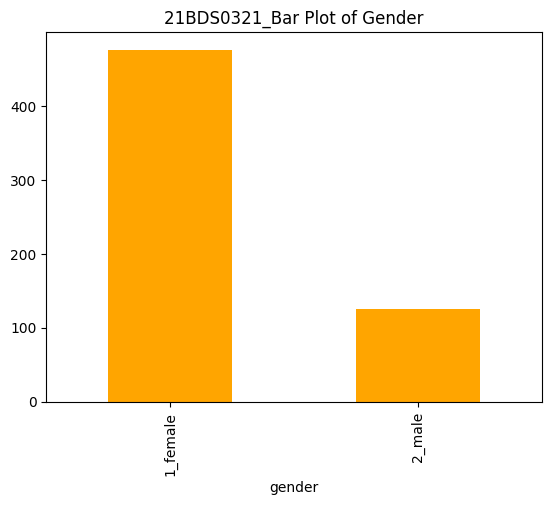

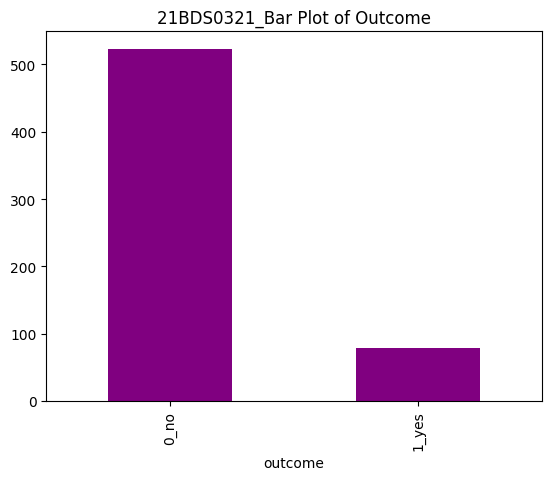

In [ ]:
# Bar plot for the gender column
data_deduplicated['gender'].value_counts().plot(kind='bar', color='orange')
plt.title('21BDS0321_Bar Plot of Gender')
plt.show()

# Bar plot for the outcome column
data_deduplicated['outcome'].value_counts().plot(kind='bar', color='purple')
plt.title('21BDS0321_Bar Plot of Outcome')
plt.show()


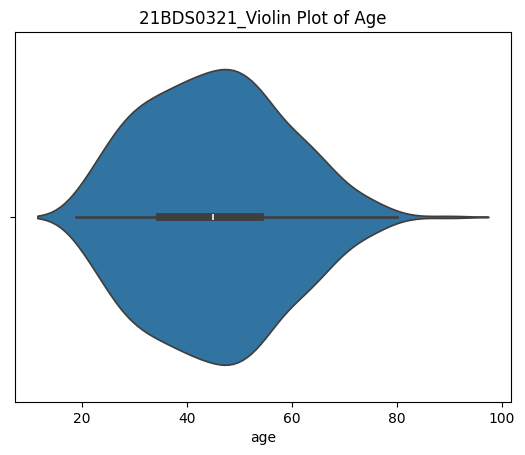

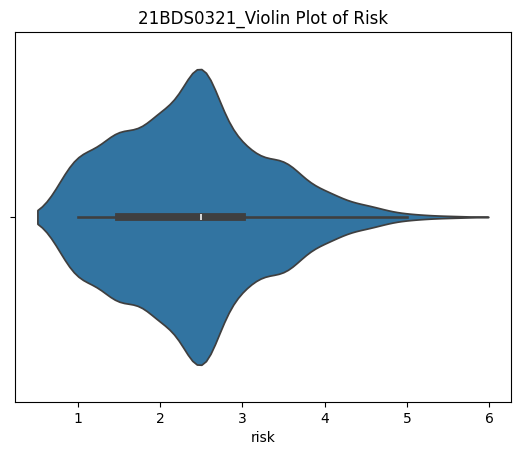

In [ ]:

# Violin plot for the age column
sns.violinplot(data=data_deduplicated, x='age')
plt.title('21BDS0321_Violin Plot of Age')
plt.show()

# Violin plot for the risk column
sns.violinplot(data=data_deduplicated, x='risk')
plt.title('21BDS0321_Violin Plot of Risk')
plt.show()


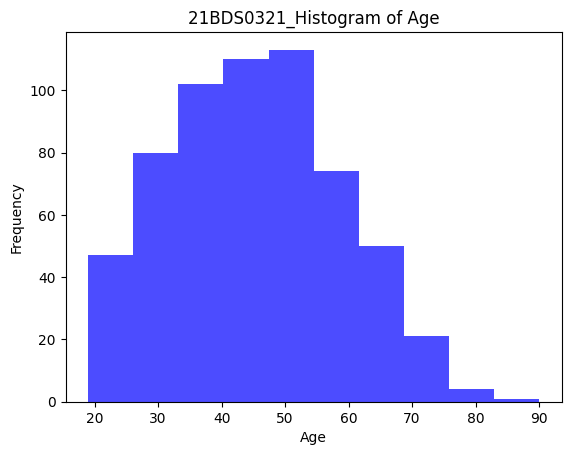

In [ ]:
# Histogram for age
data_deduplicated['age'].plot(kind='hist', bins=10, alpha=0.7, color='blue')
plt.title('21BDS0321_Histogram of Age')
plt.xlabel('Age')
plt.show()

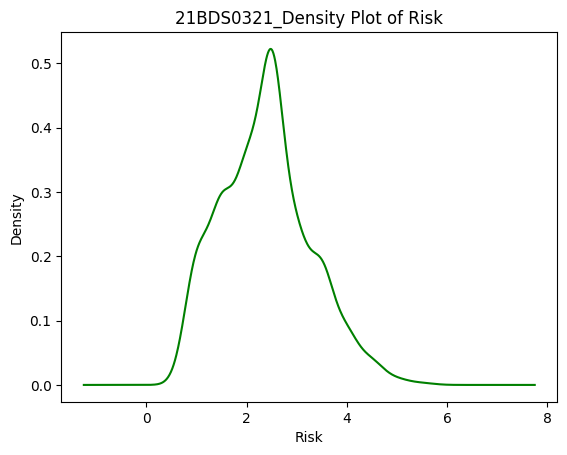

In [ ]:
# Density plot for risk
data_deduplicated['risk'].plot(kind='kde', color='green')
plt.title('21BDS0321_Density Plot of Risk')
plt.xlabel('Risk')
plt.show()

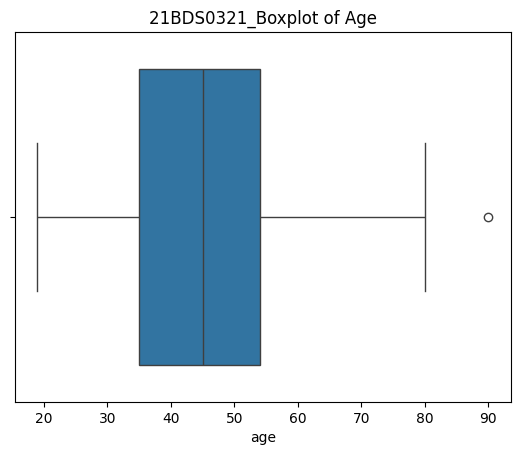

In [ ]:
# Boxplot for age
sns.boxplot(data=data_deduplicated, x='age')
plt.title('21BDS0321_Boxplot of Age')
plt.show()

In [ ]:
# Bivariate analysis - Correlation between age and risk
bivariate_age_risk = data_deduplicated[['age', 'risk']].corr()
bivariate_age_risk

,age,risk
age,1.000000,-0.216559
risk,-0.216559,1.000000


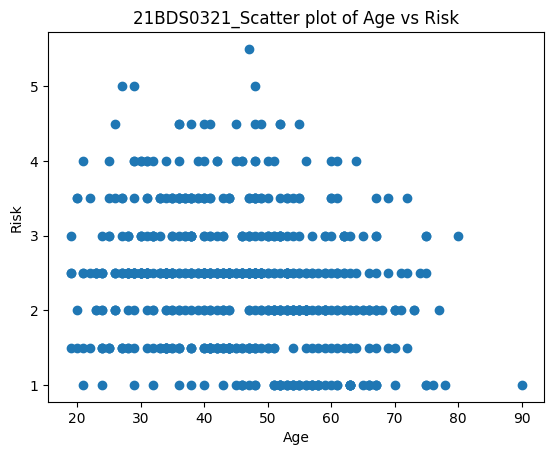

In [ ]:
# Scatter plot - age vs risk
plt.scatter(data_deduplicated['age'], data_deduplicated['risk'])
plt.xlabel('Age')
plt.ylabel('Risk')
plt.title('21BDS0321_Scatter plot of Age vs Risk')
plt.show()


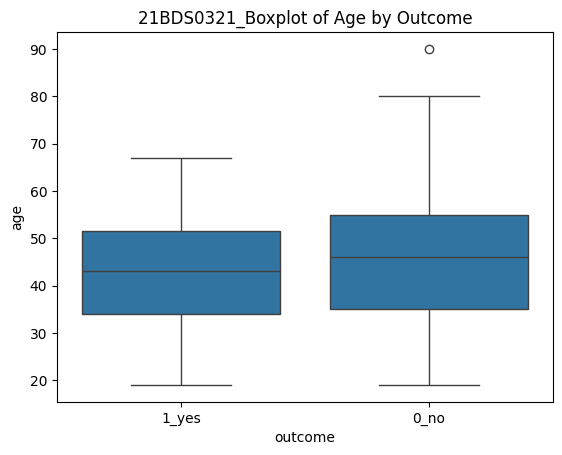

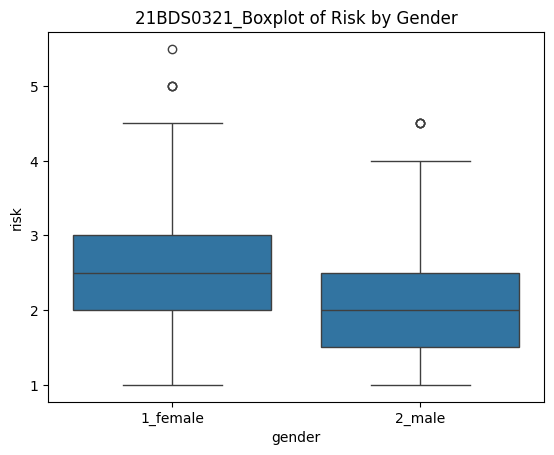

In [ ]:
# Boxplot of age vs outcome
sns.boxplot(data=data_deduplicated, x='outcome', y='age')
plt.title('21BDS0321_Boxplot of Age by Outcome')
plt.show()

# Boxplot of risk vs gender
sns.boxplot(data=data_deduplicated, x='gender', y='risk')
plt.title('21BDS0321_Boxplot of Risk by Gender')
plt.show()




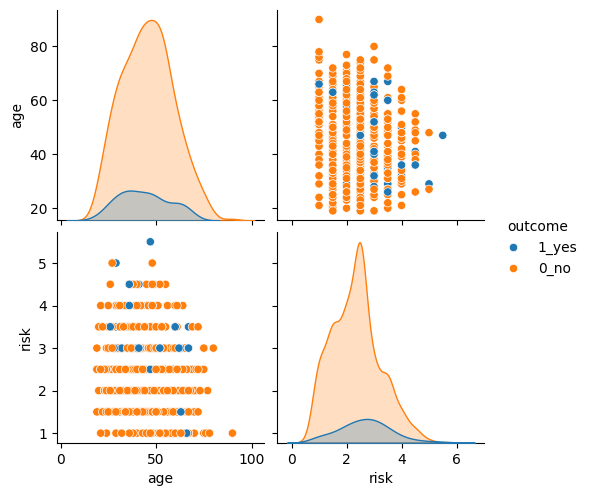

In [ ]:
# Multivariate analysis - Pairplot for age, risk, and outcome
sns.pairplot(data_deduplicated[['age', 'risk', 'outcome']], hue='outcome')
plt.show()

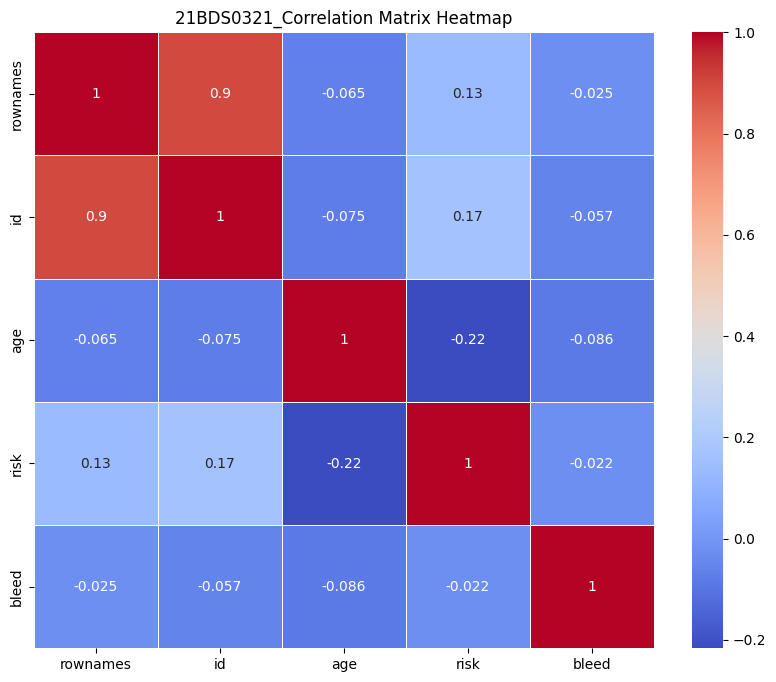

In [ ]:

# Select only the numerical columns from the dataset
numerical_data = data_deduplicated.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix for the numerical data
correlation_matrix = numerical_data.corr()

# Plotting the heatmap
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('21BDS0321_Correlation Matrix Heatmap')
plt.show()


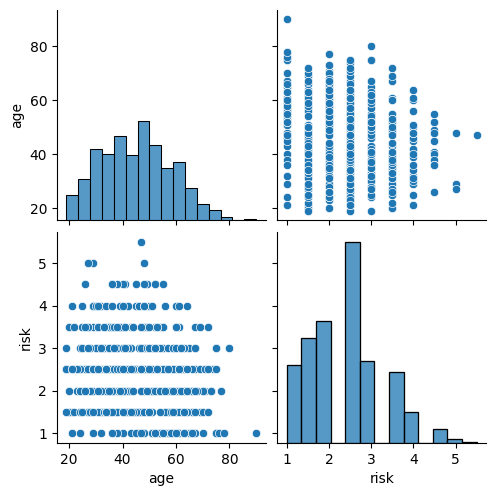

In [ ]:
# Pairplot for age, risk, and outcome (without hue)
sns.pairplot(data_deduplicated[['age', 'risk', 'outcome']])
plt.show()

In [ ]:
# Summary statistics for 1D analysis (age)
summary_1d = data_deduplicated['age'].describe()
print(summary_1d)

# 2D analysis - Cross-tabulation for gender and outcome
contingency_table = pd.crosstab(data_deduplicated['gender'], data_deduplicated['outcome'])
print(contingency_table)
# nD analysis can be extended for multivariate data (e.g., using pivot tables or groupby)


count    602.000000
mean      45.269103
std       13.297968
min       19.000000
25%       35.000000
50%       45.000000
75%       54.000000
max       90.000000
Name: age, dtype: float64
outcome   0_no  1_yes
gender               
1_female   413     63
2_male     110     16
